

# Project: Wrangle and Analyse data.

## Table of Contents
<ul>
    <li><a href="#Wrangling Data">Wrangling Data</a>
       <ul>
           <li><a href="#Gathering Data">Gathering Data</a></li>
           <li><a href="#Assessing Data">Assessing Data</a></li>
           <li><a href="#Cleaning Data">Cleaning Data</a></li>
           <li><a href="#Storing Data">Storing Data</a></li>
       </ul>
    <li><a href="#Analyzing and Visualizing">Analyzing and Visualizing</a></li>
    <li><a href="#Conclusions">Conclusions</a></li>
</ul>

<a id='Wrangling Data'></a>
# Wrangling Data

<a id='Gathering Data'></a>
## Gathering Data
> - Download the [Enhanced Twitter Archive data](https://video.udacity-data.com/topher/2018/November/5bf60fbf_twitter-archive-enhanced/twitter-archive-enhanced.csv), `twitter_archive_enhanced.csv` provided by Udacity, which contains basic tweet information
> - Download the [Image Predictions File](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv), containing the predicted breeds of dogs given by Udacity programmatically
> - Twitter API to gather retweet count and favorite count, which are notable columns additionally details of hashtags used





In [1]:
# import packages
import pandas as pd
import numpy as np
import json
import requests
%matplotlib inline 
import matplotlib.pyplot as plt
import time
import seaborn as sns
import string

#### Loading datasets

In [2]:
# load archive dataset
df_1 = pd.read_csv("datasets/twitter-archive-enhanced.csv")

In [3]:
#display few rows
df_1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
# Download and load image prediction dataset
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [5]:
with open ("image-predictions.tsv", "wb") as file:
    file.write(response.content)

In [6]:
df_2 = pd.read_csv("datasets/image-predictions.tsv", sep="\t" )
df_2.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [7]:
# read lines in text dataset as json and load 
tweet = []
with open("datasets/tweet-json.txt") as file:
    for line in file:
        data=json.loads(line)
        tweet.append(data)

In [8]:
df_3 =pd.DataFrame(tweet, columns=["id", "retweet_count", "favorite_count"])
df_3.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


<a id='Assessing Data'></a>
## Assessing Data

#### Assessing data set 1

In [9]:
#display df_1 
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
#check for null values
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

> - There are missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id columns

In [11]:
#check data_types
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> - The data has retweet data.
> - The timestamp column is in wrong data type.
> - The tweed_id should be in a sreing data type

In [12]:
pd.set_option('display.max_colwidth', 600)

In [13]:
df_1["expanded_urls"]

0                                                                       https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                                       https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                                       https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                                       https://twitter.com/dog_rates/status/891689557279858688/photo/1
4       https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
                                                                     ...                                                               
2351                                                                    https://twitter.com/dog_rates/status/666049248165822465/photo/1
2352                                            

> - The expanded_urls column should won't be needed in this analysis

In [14]:
df_1["source"]

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2351    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2354    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2355    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [15]:
df_1["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

> - The actual source values(e.i Twitter for iphone) are in the anchor tags.
> - These should be extracted.

In [16]:
#check for duplicates
df_1.duplicated().sum()

0

**There are no duplicates**

In [17]:
df_1.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [18]:
df_1.query('name == ["None", "a", "quite", "not", "one", "incredibly", "an", "very", "not", "actually","just", "getting", "mad", "unacceptable", "all", "infuriating", "such", "by", "the", "life"]')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


> - There are names like "None", "a", "quite", "not", "one", "incredibly", "an", "very", "not", "actually","just", "getting", "mad", "unacceptable", "all", "infuriating", "such", "by", "the", "life"** which are not proper names.
> - Note: This was realized through visaul assessment

In [19]:
df_1.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Karma        1
Ron          1
Maxwell      1
Trip         1
Ebby         1
Name: name, Length: 957, dtype: int64

> - The most names in the dataset are None and a. Both are not actual names.

In [20]:
# Check the unique values floofer
df_1["floofer"].unique()

array(['None', 'floofer'], dtype=object)

In [21]:
df_1.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [22]:
# Check the unique values floofer
df_1["doggo"].unique()

array(['None', 'doggo'], dtype=object)

In [23]:
df_1.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [24]:
# Check the unique values floofer
df_1["puppo"].unique()

array(['None', 'puppo'], dtype=object)

In [25]:
df_1.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [26]:
df_1["pupper"].unique()

array(['None', 'pupper'], dtype=object)

In [27]:
# Check the unique values floofer
df_1["pupper"].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

> - The values in columns floofer, pupper, doggo and puppo should be extracted and placed under one column.

In [28]:
pd.set_option("display.max_colwidth",280)

In [29]:
deno_above_10 = df_1[((df_1.rating_denominator != 10) | (df_1['rating_numerator'] > 13))]


In [30]:
deno_above_10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo,None,None,None
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805382717440/photo/1,14,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144,120,None,None,None,None,None
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1",88,80,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\r\n\r\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None


In [31]:
df_1.text

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
                                                                                       ...                                                       

> - The texts in the text cloumn have links in it.

#### accessing data set 2

In [32]:
#display df_2
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [33]:
# check datatypes
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
# Display 
df_2.p1

0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 Chihuahua
2073                 Chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

In [35]:
# display p2 column
df_2.p2

0                   collie
1       miniature_pinscher
2                 malinois
3                  redbone
4               Rottweiler
               ...        
2070      English_springer
2071    Labrador_retriever
2072              malamute
2073              Pekinese
2074                 bagel
Name: p2, Length: 2075, dtype: object

In [36]:
# Display p3 colum
df_2.p3

0                 Shetland_sheepdog
1               Rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          Doberman
                   ...             
2070    German_short-haired_pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: p3, Length: 2075, dtype: object

> - There are three dog predictions columns.
> - The dog prediction column should be one column
> - There are inconsistencies the naming under the name column.(Some starts with lowercase and others are capitalized)

In [37]:
df_2.img_num.unique()

array([1, 4, 2, 3], dtype=int64)

> - The highest number of images posted was 4

#### accessing data set 3

In [38]:
#display df_3
df_3

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [39]:
#display data type
df_3

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [40]:
#check for null values
df_3.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [41]:
#check for duplicates
df_3.duplicated().sum()

0

### Observation from assessing data
>**Quality issues**
>
>**twitter-archive-enhanced.csv**
>
>1.**The expanded_url column should be dropped for this analysis** 
>
>2.**There are missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id columns**
>
>3.**Wrong rating numerators and rating denominators**
>
>4.**The timestamp column had a wrong datatype**
>#
>5.**The actual source values should be extracted from the anchor tags**
>
>6.**Some of the tweet are not about dogs**
>
>7 **The data had retweet and reply data.**
>
>**image-predictions.tsv**
>
>8**The p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog column should be dropped.**
>
>9**There names like "None", "a", "quite", "not", "one", "incredibly", "an", "very", "not", "actually","just", "getting", "mad", "unacceptable", "all", "infuriating", "such", "by", "the", "life"** which are not proper names.**
>
>10.**The tweet_id should be changed from int to string**
>
>11.**The were inconsistencies in the breed names under the breed column**
>
>**Tidy issues**
>
>**twitter-archive-enhanced.csv**
>
>1.**doggo, floffer, pupper and puppo columns should collapsed into a single column since they are rather observations**
>
>**image-predictions.tsv**
>
>2.**The three dog prediction algorithms(p1, p2, p3) should be collapsed into a single column**

<a id='Cleaning Data'></a>
## Cleaning Data

In [42]:
#making copies for clean data
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

In [43]:
#create a function to drop rows
def drop_rows_cols(dframe, row_col, axis=0):
    dframe.drop(row_col, axis=axis, inplace=True)

### cleaning data set 1


#### Define: Remove retweet data

#### Code

In [44]:
# Drop retweets by rows and clumns
print(df_1_clean.retweeted_status_id.notnull().sum())
retweet_rows = df_1_clean[df_1_clean["retweeted_status_id"].notnull()].index

181


In [45]:
retweet_rows

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [46]:
drop_rows_cols(df_1_clean, retweet_rows, axis=0)

#### Test

In [47]:
# Confirm if rows have been successfull dropped
df_1_clean.retweeted_status_id.notnull().sum()

0

In [48]:
df_1_clean.shape

(2175, 17)

#### Define: Drop  in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_timestamp", "retweeted_status_user_id" columns

#### Code

In [49]:
#drop erroneous columns
missing_value_col = ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_timestamp", "retweeted_status_user_id"]
drop_rows_cols(df_1_clean, missing_value_col, axis=1, )

#### Test

In [50]:
# check to confirm dropped columns
#display few rows
df_1_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


#### Define: Replace wrong names with nan.

#### Code

In [51]:
not_names = ["None", "a", "quite", "not", "one", "incredibly", "an", "very", "not", "actually","just", "getting", "mad", "unacceptable", "all", "infuriating", "such", "by", "the", "life", "this"]

In [52]:
for name in not_names:
    df_1_clean["name"].replace(name, np.nan, inplace = True)
    

#### Test

In [53]:
df_1_clean["name"].value_counts()

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
           ..
Beebop      1
Ace         1
Vince       1
Duchess     1
Ebby        1
Name: name, Length: 936, dtype: int64

#### Define: "doggo", "floofer", "pupper", "puppo" columns should be collapsed into a  single column and columns removed

#### Code 

In [54]:
# handle none
dog_stages = ["doggo", "pupper", "floofer", "puppo"]
df_1_clean.doggo.replace('None', '', inplace=True)
df_1_clean.floofer.replace('None', '', inplace=True)
df_1_clean.pupper.replace('None', '', inplace=True)
df_1_clean.puppo.replace('None', '', inplace=True)

# merge into column
df_1_clean['dog_stage'] = df_1_clean.doggo + df_1_clean.floofer + df_1_clean.pupper + df_1_clean.puppo

# handle multiple stages
df_1_clean.loc[df_1_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_1_clean.loc[df_1_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_1_clean.loc[df_1_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
df_1_clean.loc[df_1_clean.dog_stage == '', 'dog_stage'] = np.nan
drop_rows_cols(df_1_clean, dog_stages, axis=1)

#### Test

In [55]:
# Check to confirm if dog_stages column was created successfully
df_1_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN


In [56]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                1397 non-null   object
 8   dog_stage           344 non-null    object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


#### Define: Timestamp should be converted from an obeject datatype to a  datetime datatype

#### Code

In [57]:
# Convert timestamp to datetime datatype
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'])

#### Test

In [58]:
# Confirm the datatype
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1397 non-null   object             
 8   dog_stage           344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 169.9+ KB


#### Define: Timestamp should be converted from an obeject datatype to a  datetime datatype

#### Code

In [59]:
# convert tweet_id to string
df_1_clean.tweet_id = df_1_clean.tweet_id.astype(str)

In [60]:
#### Test

In [61]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1397 non-null   object             
 8   dog_stage           344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 169.9+ KB


#### Define: Extract the actual values from the anchor tags in the source column

#### Code

In [62]:
#extract tweet source from sources
df_1_clean['source'] = df_1_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [63]:
# Confirm successful extraction
df_1_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define: Index and drop rows that are not tweets about dog ratings 

#### Code

In [64]:
#check the number of row and columns 
df_1_clean.shape

(2175, 9)

In [65]:
# create variables to hold and Index those rows and drop them
not_dogs_tweets = df_1_clean[df_1_clean['text'].str.match('.*only rate dog')].index
not_dogs_tweets

Int64Index([  25,   59,   93,  127,  131,  141,  154,  169,  193,  221,  226,
             246,  314,  390,  416,  419,  494,  521,  542,  732,  744,  801,
             819,  869,  887, 1017, 1031, 1071, 1077, 1085, 1090, 1097, 1102,
            1121, 1150, 1193, 1207, 1225, 1234, 1290, 1356, 1362, 1385, 1435,
            1527, 1564, 1610, 1693, 1699, 1726, 1737, 1745, 1854, 1877, 1938],
           dtype='int64')

In [66]:
# drop rows
drop_rows_cols(df_1_clean, not_dogs_tweets)

In [67]:
df_1_clean.shape

(2120, 9)

#### Test

In [68]:
# Check hape to Confirm change
df_1_clean.shape

(2120, 9)

#### Define: Drop  'expanded_urls', 'dog_stages', rating denominator, columns will not affect the analysis

#### Code

In [69]:
# drop columns
erroneous_columns = ['expanded_urls', 'dog_stage']
drop_rows_cols(df_1_clean, erroneous_columns, axis=1)


#### Confirm dropped columns 

In [70]:
df_1_clean.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie


#### Define: Index and correct wrong rating_denominator values greater

#### Code

In [71]:
# Extract rating in text and covert to int
df_1_clean['rating_numerator'] = (df_1_clean['text'].str.extract('(\d+\.*\d*/\d+)', expand=False).str.split('/').str[0]).astype(float)
df_1_clean['rating_numerator'] = df_1_clean['rating_numerator'].astype(int)

In [72]:
not_10 = df_1_clean[((df_1.rating_denominator != 10) | (df_1_clean.rating_denominator != 10))]
not_10

<ipython-input-72-7d7b69470303>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_10 = df_1_clean[((df_1.rating_denominator != 10) | (df_1_clean.rating_denominator != 10))]


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name
313,835246439529840640,2017-02-24 21:54:03+00:00,Twitter for iPhone,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,NaN
342,832088576586297345,2017-02-16 04:45:50+00:00,Twitter for iPhone,@docmisterio account started on 11/15/15,11,15,NaN
433,820690176645140481,2017-01-15 17:52:40+00:00,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,NaN
516,810984652412424192,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \r\nKeep Sam smiling by clicking and sharing this link:\r\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,Sam
902,758467244762497024,2016-07-28 01:00:57+00:00,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,NaN
1068,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,NaN
1120,731156023742988288,2016-05-13 16:15:54+00:00,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,NaN
1165,722974582966214656,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,NaN
1202,716439118184652801,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,Bluebert
1228,713900603437621249,2016-03-27 01:29:02+00:00,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,NaN


In [73]:
not_10_list = not_10.tweet_id.to_list()
print(not_10_list)

['835246439529840640', '832088576586297345', '820690176645140481', '810984652412424192', '758467244762497024', '740373189193256964', '731156023742988288', '722974582966214656', '716439118184652801', '713900603437621249', '710658690886586372', '709198395643068416', '704054845121142784', '697463031882764288', '686035780142297088', '684225744407494656', '684222868335505415', '682962037429899265', '682808988178739200', '677716515794329600', '675853064436391936', '666287406224695296']


In [74]:
# Change the surprising(inaccurate) values in rating_denominator & rating_numerator column based on text in archive_copy

# From the text of tweet id = 810984652412424192, there is no rating, hence assigning 13/10
df_1_clean.loc[df_1_clean.tweet_id == '835246439529840640', ['rating_numerator', 'rating_denominator']] = [13,10]

# From the text of tweet id = 786709082849828864, the value should be 14/10
df_1_clean.loc[df_1_clean.tweet_id == '740373189193256964', ['rating_numerator', 'rating_denominator']] = [14,10]

# From the text of tweet id = 778027034220126208, the value should be 13/10
df_1_clean.loc[df_1_clean.tweet_id == '722974582966214656', ['rating_numerator', 'rating_denominator']] = [13,10]

# From the text of tweet id = 740373189193256964, the value should be 11/10
df_1_clean.loc[df_1_clean.tweet_id == '716439118184652801', ['rating_numerator', 'rating_denominator']] = [11,10]

# From the text of tweet id = 722974582966214656, the value should be 10/10
df_1_clean.loc[df_1_clean.tweet_id == '682962037429899265', ['rating_numerator', 'rating_denominator']] = [10,10]

# From the text of tweet id = 716439118184652801, the value should be 9/10
df_1_clean.loc[df_1_clean.tweet_id == '666287406224695296', ['rating_numerator', 'rating_denominator']] = [9,10]


In [75]:
df_1_clean.query("tweet_id == '835246439529840640'")

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name
313,835246439529840640,2017-02-24 21:54:03+00:00,Twitter for iPhone,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13,10,NaN


#### Test

In [76]:
# confirm rows dropped successfully
df_1_clean.rating_numerator.value_counts()

12      487
10      431
11      416
13      307
9       149
8        96
7        52
14       43
5        34
6        32
3        18
4        16
2         9
1         7
420       2
0         2
15        1
17        1
99        1
121       1
143       1
45        1
204       1
1776      1
666       1
182       1
144       1
88        1
84        1
80        1
60        1
44        1
24        1
20        1
165       1
Name: rating_numerator, dtype: int64

#### Define: The text should be extracted from the column.

#### Code

In [77]:
# display the text column 
df_1_clean.text

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
                                                                                       ...                                                       

In [78]:
# Code to extract only the text and not the links
df_1_clean['text'] = df_1_clean['text'].str.extract('(.*)https')

In [79]:
df_1_clean['text']

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
                                                                           ...                                                                     
2351                                              Here we have a 1949 1st generation vulpix. Enjoys sweat tea an

### Test

In [80]:
# display few rows to confirm change
df_1_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin
...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,5,10,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,6,10,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,9,10,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,7,10,NaN


### cleaning dataset 2
#### Define: Convert tweet_id to string 

#### Code

In [81]:
# convert tweet_id to string
df_2_clean.tweet_id = df_2_clean.tweet_id.astype(str)

In [82]:
#### Test

In [83]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB



#### Define:  Create one column which predicts dog breed from p1, p2, p3

#### Code

In [84]:
# display df_2_clean
df_2_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [85]:
# Creat a breed column 
condition = [(df_2_clean['p1_dog'] == True),(df_2_clean['p2_dog'] == True), (df_2_clean['p3_dog'] == True)]

breed = [df_2_clean['p1'], df_2_clean['p2'], df_2_clean['p3']]

pred_conf = [df_2_clean['p1_conf'], df_2_clean['p2_conf'], df_2_clean['p3_conf']]

df_2_clean['breed'] = np.select(condition, breed, default='None')

df_2_clean['prediction'] = np.select(condition, pred_conf, default=0)

#### Test 

In [86]:
# Confirm create of breed column and values
df_2_clean['breed'].value_counts()

None                    324
golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
                       ... 
Scotch_terrier            1
Bouvier_des_Flandres      1
silky_terrier             1
EntleBucher               1
clumber                   1
Name: breed, Length: 114, dtype: int64

In [87]:
df_2_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826


#### Define: After successful creation breed column drop ('p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog') columns

#### Code

In [88]:
# Drop columns
dog_algorithms = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
drop_rows_cols(df_2_clean, dog_algorithms, axis=1)

#### Test

In [89]:
# display few rows to confirm 
df_2_clean.head()

,tweet_id,jpg_url,img_num,breed,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


#### Define: Confirm rows with "None" values in breed column and replace them  with "Unknown_breed"

#### Code

In [90]:
# Create a variable to hold indexes for none values and drop rows
df_2_clean.breed = df_2_clean.breed.replace('None', "Unknown Breed")


#### Test

In [91]:
# Confirm dropped rows
df_2_clean.breed.value_counts()

Unknown Breed           324
golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
                       ... 
Scotch_terrier            1
Bouvier_des_Flandres      1
silky_terrier             1
EntleBucher               1
clumber                   1
Name: breed, Length: 114, dtype: int64

In [92]:
# chech the shape of df_2_clean
df_2_clean.shape

(2075, 5)


#### Define
- Replace '_' with space in `breed`
- Replace '-' with space/no space for breeds wherever needed based on actual name browsing
- Convert the starting letter in `breed` from  lower case to upper case
 :


#### Code

In [93]:
# Replace '_' with empty space
df_2_clean.breed = df_2_clean.breed.str.replace('_',' ')

In [94]:
# Capitalize the starting  letters
df_2_clean.breed = df_2_clean.breed.apply(lambda x : string.capwords(x))


In [95]:
# Check the names with -
df_2_clean[df_2_clean.breed.str.contains('-')].breed.unique()

array(['Soft-coated Wheaten Terrier', 'Black-and-tan Coonhound',
       'Curly-coated Retriever', 'Flat-coated Retriever', 'Shih-tzu',
       'German Short-haired Pointer', 'Wire-haired Fox Terrier'],
      dtype=object)

In [96]:
# 'German Short-haired Pointer' should be 'German Shorthaired Pointer'
# 'Black-and-tan Coonhound' should be 'Black and Tan Coonhound'
# 'Wire-haired Fox Terrier' should be 'Wire Fox Terrier'
# 'Shih-tzu' should be 'Shih Tzu'

df_2_clean.breed = df_2_clean.breed.replace('German Short-haired Pointer', 'German Shorthaired Pointer')
df_2_clean.breed = df_2_clean.breed.replace('Black-and-tan Coonhound', 'Black and Tan Coonhound')
df_2_clean.breed = df_2_clean.breed.replace('Wire-haired Fox Terrier', 'Wire Fox Terrier')
df_2_clean.breed = df_2_clean.breed.replace('Shih-tzu', 'Shih Tzu')

#### Test :

In [97]:
# Check the names with -
df_2_clean[df_2_clean.breed.str.contains('-')].breed.unique()

array(['Soft-coated Wheaten Terrier', 'Curly-coated Retriever',
       'Flat-coated Retriever'], dtype=object)

In [98]:
# Check the unique names
df_2_clean.breed.unique()

array(['Welsh Springer Spaniel', 'Redbone', 'German Shepherd',
       'Rhodesian Ridgeback', 'Miniature Pinscher',
       'Bernese Mountain Dog', 'Unknown Breed', 'Chow',
       'Golden Retriever', 'Miniature Poodle', 'Gordon Setter',
       'Walker Hound', 'Pug', 'Bloodhound', 'Lhasa', 'English Setter',
       'Italian Greyhound', 'Maltese Dog', 'Newfoundland', 'Malamute',
       'Soft-coated Wheaten Terrier', 'Chihuahua',
       'Black and Tan Coonhound', 'Toy Terrier', 'Blenheim Spaniel',
       'Pembroke', 'Irish Terrier', 'Chesapeake Bay Retriever',
       'Curly-coated Retriever', 'Dalmatian', 'Ibizan Hound',
       'Border Collie', 'Labrador Retriever', 'Miniature Schnauzer',
       'Airedale', 'Rottweiler', 'West Highland White Terrier',
       'Toy Poodle', 'Giant Schnauzer', 'Vizsla', 'Siberian Husky',
       'Papillon', 'Saint Bernard', 'Tibetan Terrier', 'Borzoi', 'Beagle',
       'Yorkshire Terrier', 'Pomeranian', 'Kuvasz',
       'Flat-coated Retriever', 'Norwegian Elkhou

### Cleaning datatset 3

In [99]:
#display 
df_3_clean

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


#### Define: Rename id column to tweet_id

#### Code

In [100]:
df_3_clean.rename(columns={"id": "tweet_id"}, inplace=True)


#### Test

In [101]:
# Confirm rename 
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Define: Convert tweet_id to string 

#### Code

In [102]:
# convert tweet_id to string
df_3_clean.tweet_id = df_3_clean.tweet_id.astype(str)

#### Test

In [103]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Combining datasets

In [104]:
# Combine first two
archive_and_image = pd.merge(df_1_clean, df_2_clean, left_on='tweet_id', right_on='tweet_id', how="inner")

In [105]:
#display
archive_and_image.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,breed,prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unknown Breed,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581


In [106]:
master_dataset = pd.merge(archive_and_image , df_3_clean, left_on='tweet_id', right_on='tweet_id', how="inner")

In [107]:
master_dataset

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,breed,prediction,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unknown Breed,0.000000,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,5,10,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,41,111
1935,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,6,10,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,147,311
1936,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,9,10,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,47,128
1937,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,7,10,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,48,132


### Ceate rating column

In [108]:
master_dataset.shape

(1939, 13)

In [109]:
master_dataset["rating"] = master_dataset["rating_numerator"]/master_dataset["rating_denominator"]

<a id='Storing Data'></a>
## Storing Data

In [110]:
master_dataset.to_csv('datasets/twitter_archive_master.csv', index=False)

<a id='Analyzing and Visualizing'></a>
## Analyzing and Visualizing

### Create funtions to plot graph

In [111]:
def bar_plot_by(x, h, title, ylabel, xlabel, angle=0):
    fig, ax = plt.subplots(1,1)
    ax.bar(x, h)
    ax.set
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=angle)
    plt.show()

In [112]:
def reg_scatter(data, x, h, title, ylabel, xlabel, color):
    plt.figure(figsize=(15,8))
    ax = sns.regplot(x=x, y=h, data=data, color=color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

#### Load master data

In [113]:
df = pd.read_csv('datasets/twitter_archive_master.csv')

In [114]:
df.head(4)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,breed,prediction,retweet_count,favorite_count,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unknown Breed,0.000000,8853,39467,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,8964,42908,1.3


In [115]:
df.shape

(1939, 14)

#### A scatter matrix for the dataframe

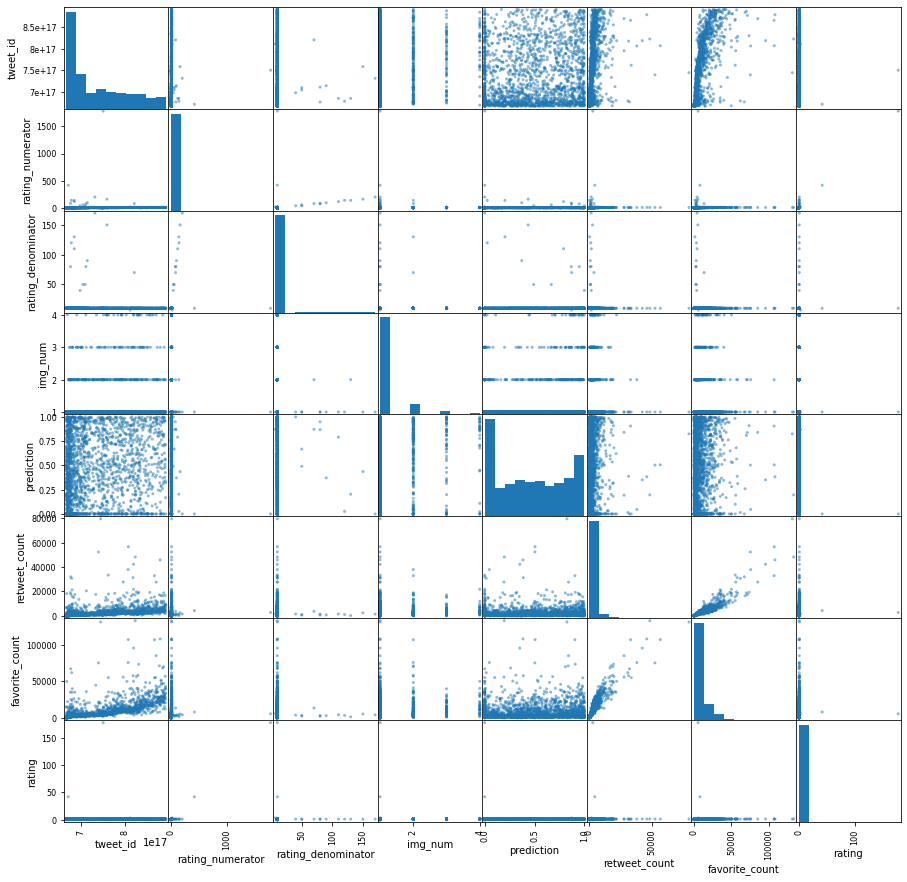

In [116]:
# plot scatter matrix
pd.plotting.scatter_matrix(df, figsize = (15,15));

<AxesSubplot:>

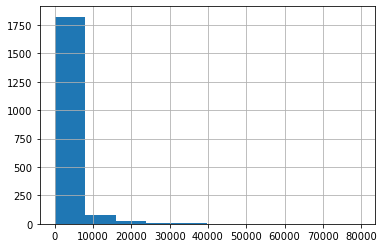

In [117]:
# Histogram for retweet_count column
df.retweet_count.hist()

**The distribution is skewed positively**

<AxesSubplot:>

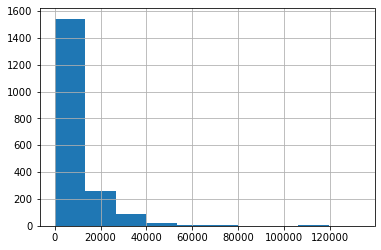

In [118]:
# Histogram for favorite_count column
df.favorite_count.hist()

**The distribution is skewed positively**

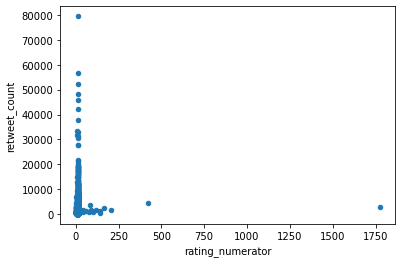

In [119]:
df.plot(x="rating_numerator", y="retweet_count", kind="scatter");

In [120]:
df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,breed,prediction,retweet_count,favorite_count,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unknown Breed,0.000000,8853,39467,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,8964,42908,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,9774,41048,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,5,10,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,41,111,0.5
1935,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,6,10,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,147,311,0.6
1936,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,9,10,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,47,128,0.9
1937,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,7,10,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,48,132,0.7


###  1. Do dogs with high ratings  have higher retweet counts?


In [121]:
#Base on the meadian use query() to group data into low rating and high rating
median = df['rating'].median()
low_rating = df.query('rating < {}'.format(median))
high_rating = df.query('rating >= {}'.format(median))

mean_retweet_low = round(low_rating['retweet_count'].mean())
mean_retweet_high = round(high_rating['retweet_count'].mean())

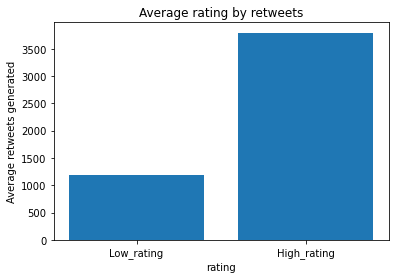

In [122]:
# Plot rating against average retweet count
heights = [mean_retweet_low, mean_retweet_high]
labels = ['Low_rating', 'High_rating']
bar_plot_by(labels, heights, 'Average rating by retweets', 'Average retweets generated','rating')


In [123]:
mean_retweet_low, mean_retweet_high

(1181, 3793)

Movies with **high rating** generate **higher retweet_counts**

###  2. Do dogs with high ratings  have higher favorite counts?

In [124]:
# Find mean favorite counts for low rating and high rating data
mean_favorites_low = round(low_rating['favorite_count'].mean())
mean_favorites_high = round(high_rating['favorite_count'].mean())

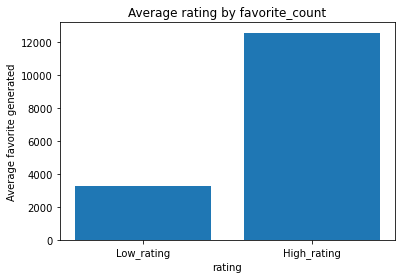

In [125]:
# Plot rating by favorite_count
heights = [mean_favorites_low, mean_favorites_high]
labels = ['Low_rating', 'High_rating']
bar_plot_by(labels, heights, 'Average rating by favorite_count', 'Average favorite generated','rating')

In [126]:
mean_favorites_low, mean_favorites_high

(3259, 12564)

Movies with **high rating** generate **higher favorite_counts**

### 3.What are the top 10 most tweeted breed?
> - Consider only known breeds

In [127]:
known_breed = df.query('breed != "Unknown Breed"')

In [128]:
print(known_breed.shape)
known_breed.head(2)

(1636, 14)


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,breed,prediction,retweet_count,favorite_count,rating
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461,1.2


In [129]:
# Counts number of times a breed occured
breed_count = known_breed['breed'].value_counts().sort_values(ascending=False)
top_10 = breed_count.head(10)

In [130]:
top_10.sort_values(ascending=False, inplace=True)
top_10

Golden Retriever      156
Labrador Retriever    102
Pembroke               92
Chihuahua              90
Pug                    59
Toy Poodle             51
Chow                   44
Pomeranian             42
Samoyed                38
Malamute               32
Name: breed, dtype: int64

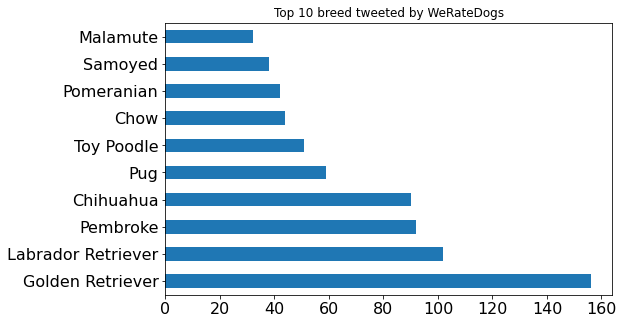

In [133]:
top_10.plot(kind="barh", figsize=(8, 5), title="Top 10 breed tweeted by WeRateDogs", fontsize=16);

The top 10 breeds tweeted by WeRateDogs are **Golden Retriever** which was tweeted 156, **Labrador Retriever** tweeted 102 times, **Pembroke** tweeted 92 times, **Chihuahua** tweeted 90 times, **Pug** tweeted 59 times, **Toy Poodle** tweeted 51 times, **Chow** tweeted 44 times, **Pomeranian** tweeted 42 times, **Samoyed** tweeted 38 times, **Malamute ** tweeted 32 times.


### 4.Which breeds had the highest average ratings, favorite count, and retweet count?
> - Consider only known breeds
> - There are other breeds with lower value count, these will be considered as outliers**

In [134]:
# Setting boundaries
boundary = known_breed.shape[0]/known_breed.breed.nunique()
boundary

14.47787610619469

**14.478** is the average count a breed should have. 

In [135]:
filter_breed = known_breed.groupby('breed').count()
filter_breed = filter_breed[filter_breed.rating >= boundary]
filter_breed.tweet_id.unique()

array([ 16,  17,  20,  21,  29,  90,  44,  22, 156,  18, 102,  32,  19,
        24,  15,  92,  42,  59,  38,  51], dtype=int64)

In [136]:
filter_breed

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,prediction,retweet_count,favorite_count,rating
breed,,,,,,,,,,,,,
American Staffordshire Terrier,16,16,16,16,16,16,11,16,16,16,16,16,16
Basset,17,17,17,17,17,17,12,17,17,17,17,17,17
Beagle,20,20,20,20,20,20,16,20,20,20,20,20,20
Cardigan,21,21,21,21,21,21,16,21,21,21,21,21,21
Chesapeake Bay Retriever,29,29,29,29,29,29,22,29,29,29,29,29,29
Chihuahua,90,90,90,90,90,90,67,90,90,90,90,90,90
Chow,44,44,44,44,44,44,36,44,44,44,44,44,44
Cocker Spaniel,29,29,29,29,29,29,20,29,29,29,29,29,29
Eskimo Dog,22,22,22,22,22,22,14,22,22,22,22,22,22


In [137]:
# Calculate the average rating for breeds having tweet count more than or equal to boundary
breed_by_rating  = pd.DataFrame((known_breed.groupby('breed').sum() / filter_breed).rating.dropna().sort_values(ascending=False)).reset_index()
top_5_breed_by_rating =breed_by_rating.head()

In [138]:
top_5_breed_by_rating

,breed,rating
0,Golden Retriever,1.175183
1,Samoyed,1.171053
2,Pembroke,1.141304
3,Eskimo Dog,1.140909
4,Chow,1.138636


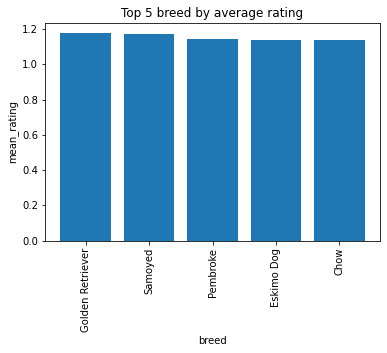

In [139]:

bar_plot_by(top_5_breed_by_rating.breed, top_5_breed_by_rating.rating, 'Top 5 breed by average rating', 'mean_rating','breed', angle=90)

The following breeds had the the highest average rating(from highest)
**Golden Retriever(1.171053)**, **Samoyed(1.171053)**, **Pembroke (1.141304)**, **Eskimo Dog(1.140909)**, and **Chow(1.138636)**, with counts of 156, 38, 98, 22, 44 respectively.
clearly theese are rare breeds and didnt ocuur that much.


In [140]:
retweet_mean_by_breed  = round(pd.DataFrame((known_breed.groupby('breed').sum() / filter_breed).retweet_count.dropna().sort_values(ascending=False)), 0).reset_index()


In [141]:
retweet_mean_by_breed.head(2)

,breed,retweet_count
0,French Bulldog,5252.0
1,Cocker Spaniel,4908.0


In [142]:
# Top 5 breed by retweet count
top_5_by_retweets =retweet_mean_by_breed.head(5)
top_5_by_retweets

,breed,retweet_count
0,French Bulldog,5252.0
1,Cocker Spaniel,4908.0
2,Samoyed,4457.0
3,Eskimo Dog,4236.0
4,Lakeland Terrier,4083.0


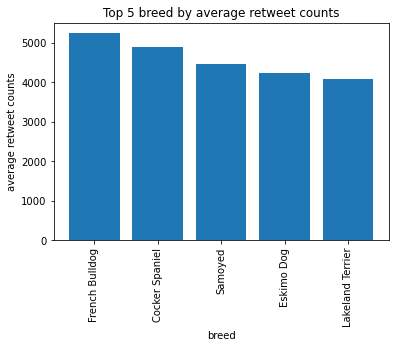

In [143]:

bar_plot_by(top_5_by_retweets.breed, top_5_by_retweets.retweet_count, 'Top 5 breed by average retweet counts', 'average retweet counts','breed', angle=90)

The breed with the highest average retweet was **French Bulldog** with an average retweet_count of 5252, followed by **Cocker Spaniel** with 4908.

In [144]:
# Breeds by favorite counts
favorite_mean_by_breed = round(pd.DataFrame((known_breed.groupby('breed').sum() / filter_breed).favorite_count.dropna().sort_values(ascending=False)), 0).reset_index()

In [145]:
# top 5 breeds by average favorite count 
top_5_by_favorites = favorite_mean_by_breed.head(5)
top_5_by_favorites

,breed,favorite_count
0,French Bulldog,19055.0
1,Cocker Spaniel,13486.0
2,Cardigan,12840.0
3,Golden Retriever,12299.0
4,Samoyed,12166.0


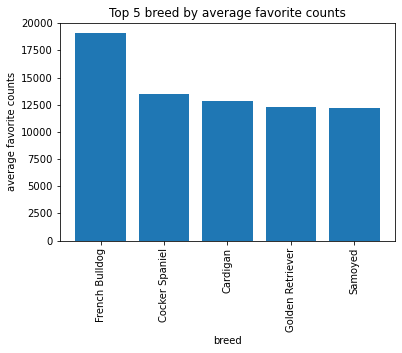

In [146]:

bar_plot_by(top_5_by_favorites.breed, top_5_by_favorites.favorite_count, 'Top 5 breed by average favorite counts', 'average favorite counts','breed', angle=90)

**French Bulldog** breed had the highest favotite_count of 19055 followed by **Cocker Spaniel** with 13486

### 4.What is the relationship between retweet_count and favorite_count?

In [147]:
# define 
retweet_count = df["retweet_count"]
favorite_count = df["favorite_count"]

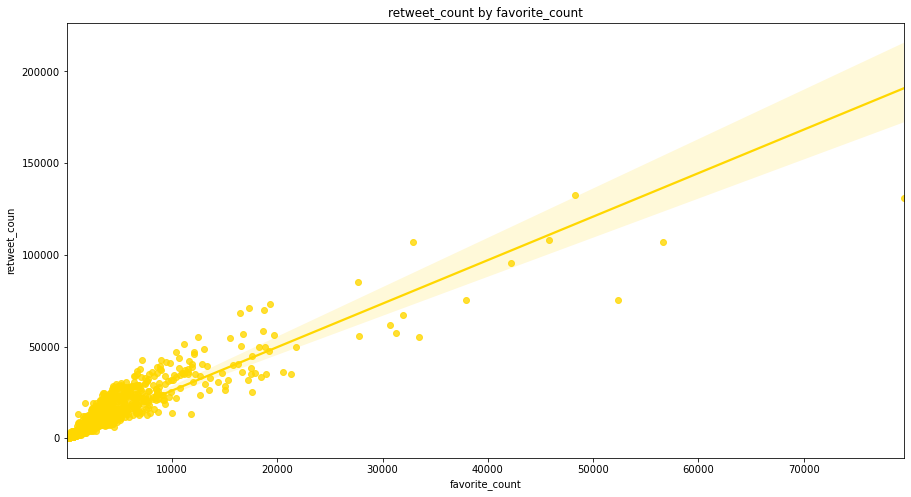

In [148]:
# PLot a regplot
reg_scatter(df, retweet_count, favorite_count, "retweet_count by favorite_count", "retweet_coun", "favorite_count", "gold")

There is a positive correlation between **favorite_count* and **retweet_count**.
They affect each other

### 5.What was the highest rating attained by a dog and what was the impact of the number of images on the retweet and favorite counts on high rated dogs?

In [149]:
df.sort_values(by="rating", ascending=False, inplace=True)

In [150]:
df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,breed,prediction,retweet_count,favorite_count,rating
701,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af. 1776/10,1776,10,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,Unknown Breed,0.000000,2772,5569,177.600000
1663,670842764863651840,2015-11-29 05:52:33+00:00,Twitter for iPhone,Good dogg. 420/10,420,10,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,Unknown Breed,0.000000,4324,7989,42.000000
368,810984652412424192,2016-12-19 23:06:23+00:00,Twitter for iPhone,https://t.co/98tB8y7y7t,24,7,Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,Golden Retriever,0.871342,1655,5927,3.428571
48,881536004380872706,2017-07-02 15:32:16+00:00,Twitter for iPhone,(IG: puffie_the_chow),14,10,NaN,https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg,1,Samoyed,0.281463,16570,50199,1.400000
124,860184849394610176,2017-05-04 17:30:24+00:00,Twitter for iPhone,"Here we have perhaps the wisest dog of all. Above average with light sabers. Immortal as h*ck. 14/10 dog, or dog not, there is no try",14,10,NaN,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,1,Unknown Breed,0.000000,6295,17474,1.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,670783437142401025,2015-11-29 01:56:48+00:00,Twitter for iPhone,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10,1,10,NaN,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,Unknown Breed,0.000000,431,872,0.100000
1845,667549055577362432,2015-11-20 03:44:31+00:00,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10,1,10,NaN,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,Unknown Breed,0.000000,2454,6138,0.100000
1466,675153376133427200,2015-12-11 03:21:23+00:00,Twitter for iPhone,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table,1,10,NaN,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,Unknown Breed,0.000000,2734,6072,0.100000
731,746906459439529985,2016-06-26 03:22:31+00:00,Twitter for iPhone,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment",0,10,NaN,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,1,Unknown Breed,0.000000,336,3168,0.000000


In [151]:
top_rated_dogs = (df[df["rating"] >= 1.4])
top_rated_dogs_df = top_rated_dogs[["rating", "img_num", "retweet_count", "favorite_count"]]
top_rated_dogs_df = top_rated_dogs_df.reset_index()
top_rated_dogs_df.drop(["index"], axis=1, inplace=True)

top_rated_dogs_df.head()

,rating,img_num,retweet_count,favorite_count
0,177.600000,1,2772,5569
1,42.000000,1,4324,7989
2,3.428571,1,1655,5927
3,1.400000,1,16570,50199
4,1.400000,1,6295,17474


In [152]:
top_rated_dogs_df.shape

(38, 4)

In [153]:
top_rated_dogs_df.groupby("rating").count()

,img_num,retweet_count,favorite_count
rating,,,
1.400000,35,35,35
3.428571,1,1,1
42.000000,1,1,1
177.600000,1,1,1


> - The highest rating rating attained by a dog was **177.6**
**38** dogs were rated **177.600000 to 1.4**. Out the **38, 35 dogs were rated 1.4**. The difference between the two is very huge.

##### To perform  analysis on the highest rated only dogs with 1.4 rating should be considered

In [154]:
filter_top_rated_dogs_df = top_rated_dogs_df.query("rating == 1.400000")

In [155]:
filter_top_rated_dogs_df.head(5)

,rating,img_num,retweet_count,favorite_count
3,1.4,1,16570,50199
4,1.4,1,6295,17474
5,1.4,4,8285,33911
6,1.4,4,6841,29086
7,1.4,1,2068,12446


In [156]:
# Group highest rating by number of images
one_image_rcount = round(filter_top_rated_dogs_df.query("img_num==1").retweet_count.mean())
two_image_rcount = round(filter_top_rated_dogs_df.query("img_num==2").retweet_count.mean())
three_image_rcount = round(filter_top_rated_dogs_df.query("img_num==3").retweet_count.mean())
four_image_rcount = round(filter_top_rated_dogs_df.query("img_num==4").retweet_count.mean())

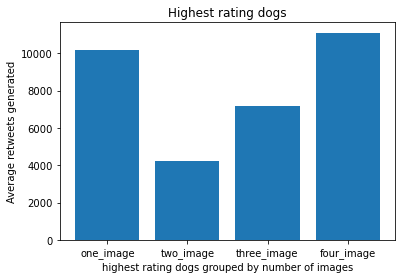

In [157]:
# plot a barchart
heights = [one_image_rcount, two_image_rcount, three_image_rcount, four_image_rcount]
labels = ['one_image', 'two_image', 'three_image', 'four_image']
bar_plot_by(labels, heights, 'Highest rating dogs', 'Average retweets generated','highest rating dogs grouped by number of images')

In [158]:
one_image_rcount, two_image_rcount, three_image_rcount, four_image_rcount

(10172, 4252, 7183, 11094)

From the graph high rated dogs with **4 images** had a high average retweet_count of **11094** than the others.
The second with high average retweet counts was the ones with **1 image** with **10172**


In [159]:
one_image_fcount = round(filter_top_rated_dogs_df.query("img_num==1").favorite_count.mean())
two_image_fcount = round(filter_top_rated_dogs_df.query("img_num==2").favorite_count.mean())
three_image_fcount = round(filter_top_rated_dogs_df.query("img_num==3").favorite_count.mean())
four_image_fcount = round(filter_top_rated_dogs_df.query("img_num==4").favorite_count.mean())

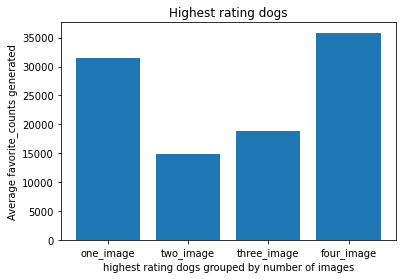

In [160]:
heights = [one_image_fcount, two_image_fcount, three_image_fcount, four_image_fcount]
labels = ['one_image', 'two_image', 'three_image', 'four_image']
bar_plot_by(labels, heights, 'Highest rating dogs', 'Average favorite_counts generated','highest rating dogs grouped by number of images')

In [161]:
one_image_fcount, two_image_fcount, three_image_fcount, four_image_fcount

(31449, 14825, 18865, 35834)

From the graph high rating dogs with **4 image** had a high average favorite_count of **35834** than the others.
The second with high average retweet counts was the ones with **1 image** with **31449**.
The order was same with highest rating and average retweet_count

<a id='Conclusions'></a>
### Conclusions

>Dogs with **high ratings** generate higher **retweet_count** than dogs with **low rating**. The average retweet counts for high rating dog was **3793** and the average for low rated dog was **1181**.
>
>Dogs with high rating generate an average **favorite_count** of **12564** which is higher compared to the **3259** 
**favorite_count** for lowrating dogs.
>
>The top 10 breeds tweeted by WeRateDogs are **Golden Retriever which was tweeted 156, Labrador Retriever tweeted 102 times, Pembroke tweeted 92 times, Chihuahua tweeted 90 times, Pug tweeted 59 times, Toy Poodle tweeted 51 times, Chow tweeted 44 times, Pomeranian tweeted 42 times, Samoyed tweeted 38 times, *Malamute * tweeted 32 times**.
>
>The top five dogs with the highest ratings were **Golden Retriever, Samoyed, Pembroke, Eskimo Dog and Chow** with ratings **1.171053, 1.171053, 1.141304, 1.140909 and 1.138636** and counts of **156, 38, 98, 22 and 44** respectively. 
>
>The breed with the **highest average retweet** was **French Bulldog with an average retweet_count of 5252**, followed by 
**Cocker Spaniel with 4908, Samoyed with 4457, Eskimo Dog with 4236, Lakeland Terrier with 4083**.
>
>**French Bulldog, Cocker Spaniel, Cardigan, Golden Retriever and Samoyed** were the top 5 breeds based on average favorite counts with average favorite counts of **19055, 13486, 12840, 12299 and 12166** respectively.
>
>There is a **positive correlation between favorite_count and retweet_count**. They affect each other.
>
>The highest rating attained by a dog was **177.6**.
>
>From the graph high rating dogs with **4 image** had a high average retweet count of *11094*. This was followed by the ones with *four images* which had average retweet count **10172**, then the ones with **three images** which had average retweet count **7183** and lastly the ones with **two images** which had average retweet count **4252**.

>
>From the graph high rating dogs with **4 images** had a high average favorite count of **35834**. This was followed by the ones with **1 image** which had average favorite count **31449**, then the ones with **three images** which had average favorite count **18865** and lastly the ones with two images which had average favorite count **14825**. 


In [162]:
import urllib.request
image_url = "https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg"
filename = "images/Aticus.jpg"
urllib.request.urlretrieve(image_url, filename)

('images/Aticus.jpg', <http.client.HTTPMessage at 0x264eebb0ca0>)